In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:

def normalize(column):
    
    ps = np.array([column["p1"],column["p2"],column["p3"],column["p4"],column["p5"]])
    psum = np.sum(ps)
    
    column["p1"] = ps[0]/psum
    column["p2"] = ps[1]/psum
    column["p3"] = ps[2]/psum
    column["p4"] = ps[3]/psum
    column["p5"] = ps[4]/psum
    
    return column

def score(row):
    score = row["p1"]*1 + row["p2"]*2 + row["p3"]*3 + row["p4"]*4 + row["p5"]*5
    return score

In [29]:
#incontext
##personas
# data = pd.read_csv('../output_raw/incontext/gpt-3.5-turbo-0613_personas_bfi.csv')
# data = pd.read_csv('../output_raw/incontext/gpt-4-0613_personas_bfi.csv')
# data = pd.read_csv('../output_raw/incontext/llama-2-70b-chat_personas_bfi.csv')
##empty_personas
# data = pd.read_csv('../output_raw/incontext/gpt-3.5-turbo-0613_empty_personas_bfi.csv')
# data = pd.read_csv('../output_raw/incontext/gpt-4-0613_empty_personas_bfi_100_temp1.csv')
# data = pd.read_csv('../output_raw/incontext/llama-2-70b-chat_empty_personas_bfi.csv')
##seeded
# data = pd.read_csv('../output_raw/incontext/gpt-3.5-turbo-0613_empty_personas_bfi_seeded.csv')
# data = pd.read_csv('../output_raw/incontext/gpt-4-0613_empty_personas_bfi_seeded.csv')
data = pd.read_csv('../output_raw/incontext/llama-2-70b-chat_empty_personas_bfi_seeded.csv')
#nocontext
##personas
# data = pd.read_csv('../output_raw/nocontext/gpt-3.5-turbo-0613_personas_bfi.csv')
# data = pd.read_csv('../output_raw/nocontext/gpt-4-0613_personas_bfi.csv')
# data = pd.read_csv('../output_raw/nocontext/llama-2-70b-chat_personas_bfi.csv')
##empty_personas
# data = pd.read_csv('../output_raw/gpt-3.5-turbo-0613_empty_personas_bfi_100_temp1.csv')
# data = pd.read_csv('../output_raw/gpt-4-0613_empty_personas_bfi_100_temp1.csv')
# data = pd.read_csv('../output_raw/llama-2-70b-chat_empty_personas_bfi_100.csv')


bfi = pd.read_csv('../psytests/BFI2.csv')
data = data.apply(normalize,axis = 1)
data["score"] = data.apply(score,axis=1)
data.loc[data["reverse"]==1,"score"] = 6-data.loc[data["reverse"]==1,"score"]

In [30]:
## Use this for empty personas and seeded experiment
factor_data = []
for run in range(0,100):
    for options in data["options"].unique():
        for answers in data["answers"].unique():
            for reverse_options in data["reverse_options"].unique():
                for reverse_answers in data["reverse_answers"].unique():
                    for instruction in data["instruction"].unique():
                        for meta in data["meta"].unique():
                            # print(meta)
                            values = {}
                            df = data.iloc[(run*60):((run+1)*60)]
                            
                            
                            df = df[df["options"] == options]
                            df = df[df["answers"] == answers]
                            df = df[df["reverse_answers"] == reverse_answers]
                            df = df[df["reverse_options"] == reverse_options]
                            df = df[df["instruction"] == instruction]
                            df = df[df["meta"] == meta]
                            df.reset_index(drop=True, inplace=True)
                            for item in df["item"].unique():
                                df_c = df[df["item"] == item]
                                code = bfi[bfi["text"] == item]
                                code = code["label_ocean"].values[0]+"_"+str(code["No"].values[0])+"_"+str(code["key"].values[0])
                                values[code] = df_c["score"].values[0]
                            factor_data.append(values)

In [26]:
## Use this for personas experiment
factor_data = []
for persona in data["persona"].unique():
    for options in data["options"].unique():
        for answers in data["answers"].unique():
            for reverse_options in data["reverse_options"].unique():
                for reverse_answers in data["reverse_answers"].unique():
                    for instruction in data["instruction"].unique():
                        for meta in data["meta"].unique():
                            # print(meta)
                            values = {}
                            try:
                                x = float(persona)
                                if math.isnan(x):
                                    df = data[data["persona"].isnull()]
                            except:
                                df = data[data["persona"] == persona]
                            
                            
                            df = df[df["options"] == options]
                            df = df[df["answers"] == answers]
                            df = df[df["reverse_answers"] == reverse_answers]
                            df = df[df["reverse_options"] == reverse_options]
                            df = df[df["instruction"] == instruction]
                            df = df[df["meta"] == meta]
                            df.reset_index(drop=True, inplace=True)
                            for item in df["item"].unique():
                                df_c = df[df["item"] == item]
                                code = bfi[bfi["text"] == item]
                                code = code["label_ocean"].values[0]+"_"+str(code["No"].values[0])+"_"+str(code["key"].values[0])
                                values[code] = df_c["score"].values[0]
                            factor_data.append(values)

In [31]:
data_fa = pd.DataFrame(factor_data) ###write data to csv for analysis in R
data_fa.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_empty_personas_seeded_factor_data.csv', index=False)

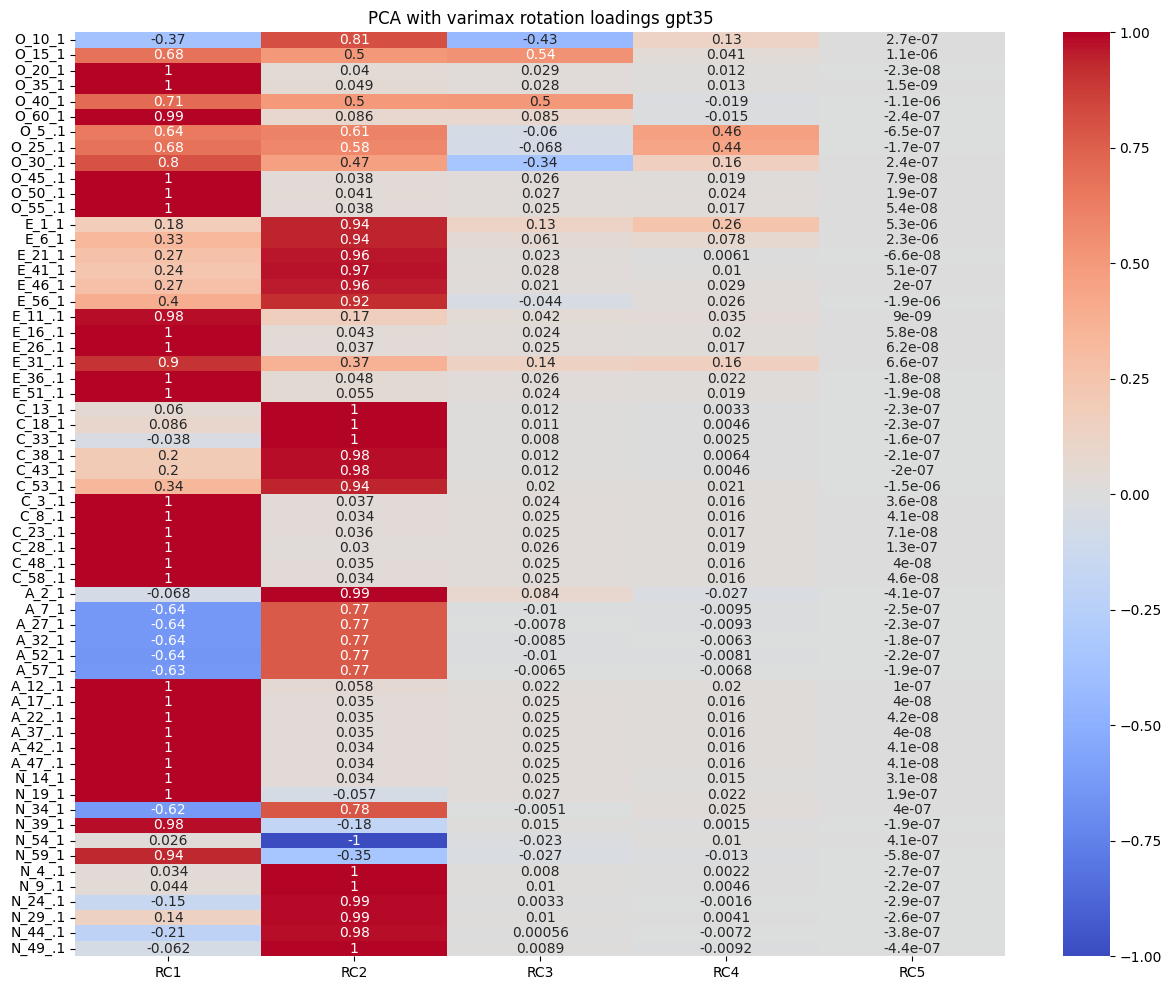

In [33]:
# Erstelle einen DataFrame für die Faktorladungen
pca_loadings_df = pd.read_csv('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_empty_personas_seeded.csv')
pca_loadings_df.index = pca_loadings_df["Unnamed: 0"].values
pca_loadings_df.drop(columns=["Unnamed: 0"], inplace=True)

# Erstelle den Heatmap-Plot
plt.figure(figsize=(15, 12))
sns.heatmap(pca_loadings_df, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('PCA with varimax rotation loadings llama2')
plt.show()

### Here we divide the responses into item/facet sepcific groups for easier analysis in R

In [4]:
df_llama = pd.read_csv('./preprocessed_final/llama_2_personas_factor_data.csv')
df_llama_O = df_llama[df_llama.columns[:12]]
df_llama_E = df_llama[df_llama.columns[12:24]]
df_llama_C = df_llama[df_llama.columns[24:36]]
df_llama_A = df_llama[df_llama.columns[36:48]]
df_llama_N = df_llama[df_llama.columns[48:60]]


cols_O = ["O"+str(i) for i in range(len(df_llama_O.columns))]
cols_E = ["E"+str(i) for i in range(len(df_llama_E.columns))]
cols_C = ["C"+str(i) for i in range(len(df_llama_C.columns))]
cols_A = ["A"+str(i) for i in range(len(df_llama_A.columns))]
cols_N = ["N"+str(i) for i in range(len(df_llama_N.columns))]

df_llama_O.columns = cols_O
df_llama_E.columns = cols_E
df_llama_C.columns = cols_C
df_llama_A.columns = cols_A
df_llama_N.columns = cols_N
df_llama_O.to_csv('./preprocessed_final/llama_2_personas_factor_data_O.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/llama_2_personas_factor_data_E.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/llama_2_personas_factor_data_C.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/llama_2_personas_factor_data_A.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/llama_2_personas_factor_data_N.csv', index=False)

In [5]:
df_llama = pd.read_csv('./preprocessed_final/chatgpt_personas_factor_data.csv')
df_llama_O = df_llama[df_llama.columns[:12]]
df_llama_E = df_llama[df_llama.columns[12:24]]
df_llama_C = df_llama[df_llama.columns[24:36]]
df_llama_A = df_llama[df_llama.columns[36:48]]
df_llama_N = df_llama[df_llama.columns[48:60]]

cols_O = ["O"+str(i) for i in range(len(df_llama_O.columns))]
cols_E = ["E"+str(i) for i in range(len(df_llama_E.columns))]
cols_C = ["C"+str(i) for i in range(len(df_llama_C.columns))]
cols_A = ["A"+str(i) for i in range(len(df_llama_A.columns))]
cols_N = ["N"+str(i) for i in range(len(df_llama_N.columns))]

df_llama_O.columns = cols_O
df_llama_E.columns = cols_E
df_llama_C.columns = cols_C
df_llama_A.columns = cols_A
df_llama_N.columns = cols_N
df_llama_O.to_csv('./preprocessed_final/chatgpt_personas_factor_data_O.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/chatgpt_personas_factor_data_E.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/chatgpt_personas_factor_data_C.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/chatgpt_personas_factor_data_A.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/chatgpt_personas_factor_data_N.csv', index=False)

In [114]:
df_llama = pd.read_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_personas_factor_data.csv')
df_llama_O = df_llama[df_llama.columns[:12]]
df_llama_E = df_llama[df_llama.columns[12:24]]
df_llama_C = df_llama[df_llama.columns[24:36]]
df_llama_A = df_llama[df_llama.columns[36:48]]
df_llama_N = df_llama[df_llama.columns[48:60]]


cols_O = ["O"+str(i) for i in range(len(df_llama_O.columns))]
cols_E = ["E"+str(i) for i in range(len(df_llama_E.columns))]
cols_C = ["C"+str(i) for i in range(len(df_llama_C.columns))]
cols_A = ["A"+str(i) for i in range(len(df_llama_A.columns))]
cols_N = ["N"+str(i) for i in range(len(df_llama_N.columns))]

df_llama_O.columns = cols_O
df_llama_E.columns = cols_E
df_llama_C.columns = cols_C
df_llama_A.columns = cols_A
df_llama_N.columns = cols_N
df_llama_O.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_personas_factor_data_O.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_personas_factor_data_E.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_personas_factor_data_C.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_personas_factor_data_A.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_personas_factor_data_N.csv', index=False)

In [2]:
df_llama = pd.read_csv('./preprocessed_final/incontext/gpt35_incontext_personas_factor_data.csv')
df_llama_O = df_llama[df_llama.columns[:12]]
df_llama_E = df_llama[df_llama.columns[12:24]]
df_llama_C = df_llama[df_llama.columns[24:36]]
df_llama_A = df_llama[df_llama.columns[36:48]]
df_llama_N = df_llama[df_llama.columns[48:60]]


cols_O = ["O"+str(i) for i in range(len(df_llama_O.columns))]
cols_E = ["E"+str(i) for i in range(len(df_llama_E.columns))]
cols_C = ["C"+str(i) for i in range(len(df_llama_C.columns))]
cols_A = ["A"+str(i) for i in range(len(df_llama_A.columns))]
cols_N = ["N"+str(i) for i in range(len(df_llama_N.columns))]

df_llama_O.columns = cols_O
df_llama_E.columns = cols_E
df_llama_C.columns = cols_C
df_llama_A.columns = cols_A
df_llama_N.columns = cols_N
df_llama_O.to_csv('./preprocessed_final/incontext/gpt35_incontext_personas_factor_data_O.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/incontext/gpt35_incontext_personas_factor_data_E.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/incontext/gpt35_incontext_personas_factor_data_C.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/incontext/gpt35_incontext_personas_factor_data_A.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/incontext/gpt35_incontext_personas_factor_data_N.csv', index=False)

In [60]:
df_llama = pd.read_csv('./preprocessed_final/incontext/gpt4_incontext_personas_factor_data.csv')
df_llama_O = df_llama[df_llama.columns[:12]]
df_llama_E = df_llama[df_llama.columns[12:24]]
df_llama_C = df_llama[df_llama.columns[24:36]]
df_llama_A = df_llama[df_llama.columns[36:48]]
df_llama_N = df_llama[df_llama.columns[48:60]]


cols_O = ["O"+str(i) for i in range(len(df_llama_O.columns))]
cols_E = ["E"+str(i) for i in range(len(df_llama_E.columns))]
cols_C = ["C"+str(i) for i in range(len(df_llama_C.columns))]
cols_A = ["A"+str(i) for i in range(len(df_llama_A.columns))]
cols_N = ["N"+str(i) for i in range(len(df_llama_N.columns))]

df_llama_O.columns = cols_O
df_llama_E.columns = cols_E
df_llama_C.columns = cols_C
df_llama_A.columns = cols_A
df_llama_N.columns = cols_N
df_llama_O.to_csv('./preprocessed_final/incontext/gpt4_incontext_personas_factor_data_O.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/incontext/gpt4_incontext_personas_factor_data_E.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/incontext/gpt4_incontext_personas_factor_data_C.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/incontext/gpt4_incontext_personas_factor_data_A.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/incontext/gpt4_incontext_personas_factor_data_N.csv', index=False)

In [10]:
df_llama = pd.read_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_empty_personas_seeded_factor_data.csv')
df_llama_O = df_llama[df_llama.columns[:12]]
df_llama_E = df_llama[df_llama.columns[12:24]]
df_llama_C = df_llama[df_llama.columns[24:36]]
df_llama_A = df_llama[df_llama.columns[36:48]]
df_llama_N = df_llama[df_llama.columns[48:60]]


cols_O = ["O"+str(i) for i in range(len(df_llama_O.columns))]
cols_E = ["E"+str(i) for i in range(len(df_llama_E.columns))]
cols_C = ["C"+str(i) for i in range(len(df_llama_C.columns))]
cols_A = ["A"+str(i) for i in range(len(df_llama_A.columns))]
cols_N = ["N"+str(i) for i in range(len(df_llama_N.columns))]

df_llama_O.columns = cols_O
df_llama_E.columns = cols_E
df_llama_C.columns = cols_C
df_llama_A.columns = cols_A
df_llama_N.columns = cols_N
df_llama_O.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_empty_personas_seeded_factor_data_O.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_empty_personas_seeded_factor_data_E.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_empty_personas_seeded_factor_data_C.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_empty_personas_seeded_factor_data_A.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/incontext/llama2_70b_chat_incontext_empty_personas_seeded_factor_data_N.csv', index=False)

In [11]:
df_llama = pd.read_csv('./preprocessed_final/incontext/gpt35_incontext_empty_personas_seeded_factor_data.csv')
df_llama_O = df_llama[df_llama.columns[:12]]
df_llama_E = df_llama[df_llama.columns[12:24]]
df_llama_C = df_llama[df_llama.columns[24:36]]
df_llama_A = df_llama[df_llama.columns[36:48]]
df_llama_N = df_llama[df_llama.columns[48:60]]


cols_O = ["O"+str(i) for i in range(len(df_llama_O.columns))]
cols_E = ["E"+str(i) for i in range(len(df_llama_E.columns))]
cols_C = ["C"+str(i) for i in range(len(df_llama_C.columns))]
cols_A = ["A"+str(i) for i in range(len(df_llama_A.columns))]
cols_N = ["N"+str(i) for i in range(len(df_llama_N.columns))]

df_llama_O.columns = cols_O
df_llama_E.columns = cols_E
df_llama_C.columns = cols_C
df_llama_A.columns = cols_A
df_llama_N.columns = cols_N
df_llama_O.to_csv('./preprocessed_final/incontext/gpt35_incontext_empty_personas_seeded_factor_data_O.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/incontext/gpt35_incontext_empty_personas_seeded_factor_data_E.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/incontext/gpt35_incontext_empty_personas_seeded_factor_data_C.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/incontext/gpt35_incontext_empty_personas_seeded_factor_data_A.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/incontext/gpt35_incontext_empty_personas_seeded_factor_data_N.csv', index=False)

In [12]:
df_llama = pd.read_csv('./preprocessed_final/incontext/gpt4_incontext_empty_personas_seeded_factor_data.csv')
df_llama_O = df_llama[df_llama.columns[:12]]
df_llama_E = df_llama[df_llama.columns[12:24]]
df_llama_C = df_llama[df_llama.columns[24:36]]
df_llama_A = df_llama[df_llama.columns[36:48]]
df_llama_N = df_llama[df_llama.columns[48:60]]


cols_O = ["O"+str(i) for i in range(len(df_llama_O.columns))]
cols_E = ["E"+str(i) for i in range(len(df_llama_E.columns))]
cols_C = ["C"+str(i) for i in range(len(df_llama_C.columns))]
cols_A = ["A"+str(i) for i in range(len(df_llama_A.columns))]
cols_N = ["N"+str(i) for i in range(len(df_llama_N.columns))]

df_llama_O.columns = cols_O
df_llama_E.columns = cols_E
df_llama_C.columns = cols_C
df_llama_A.columns = cols_A
df_llama_N.columns = cols_N
df_llama_O.to_csv('./preprocessed_final/incontext/gpt4_incontext_empty_personas_seeded_factor_data_O.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/incontext/gpt4_incontext_empty_personas_seeded_factor_data_E.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/incontext/gpt4_incontext_empty_personas_seeded_factor_data_C.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/incontext/gpt4_incontext_empty_personas_seeded_factor_data_A.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/incontext/gpt4_incontext_empty_personas_seeded_factor_data_N.csv', index=False)

In [3]:
df_llama = pd.read_csv('./preprocessed_final/gpt4_personas_factor_data.csv')
df_llama_O = df_llama[df_llama.columns[:12]]
df_llama_E = df_llama[df_llama.columns[12:24]]
df_llama_C = df_llama[df_llama.columns[24:36]]
df_llama_A = df_llama[df_llama.columns[36:48]]
df_llama_N = df_llama[df_llama.columns[48:60]]


cols_O = ["O"+str(i) for i in range(len(df_llama_O.columns))]
cols_E = ["E"+str(i) for i in range(len(df_llama_E.columns))]
cols_C = ["C"+str(i) for i in range(len(df_llama_C.columns))]
cols_A = ["A"+str(i) for i in range(len(df_llama_A.columns))]
cols_N = ["N"+str(i) for i in range(len(df_llama_N.columns))]

df_llama_O.columns = cols_O
df_llama_E.columns = cols_E
df_llama_C.columns = cols_C
df_llama_A.columns = cols_A
df_llama_N.columns = cols_N
df_llama_O.to_csv('./preprocessed_final/gpt4_personas_factor_data_O.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/gpt4_personas_factor_data_E.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/gpt4_personas_factor_data_C.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/gpt4_personas_factor_data_A.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/gpt4_personas_factor_data_N.csv', index=False)

### This is for the human data of the openpsy

In [14]:
def adj(score):
    return (5+score*-1)+1

In [15]:
df_llama = pd.read_csv('./preprocessed_final/data_human_responses_only.csv')
keys = {"EXT1": 1, "EXT2": -1, "EXT3": 1, "EXT4": -1, "EXT5":1, "EXT6":-1, "EXT7":1, "EXT8":-1, "EXT9":1, "EXT10":-1, "EST1": 1, "EST2":-1, "EST3":1, "EST4": -1, "EST5": 1, "EST6":1, "EST7":1, "EST8":1,
"EST9": 1, "EST10": 1, "AGR1": -1,"AGR2":1 , "AGR3": -1,"AGR4":1, "AGR5": -1,"AGR6":1, "AGR7": -1, "AGR8":1, "AGR9":1, "AGR10":1, "CSN1":1,"CSN2":-1,"CSN3":1, "CSN4":-1,"CSN5":1, "CSN6":-1,"CSN7":1 ,"CSN8":-1,"CSN9":1,
"CSN10":1, "OPN1":1,"OPN2":-1, "OPN3":1,"OPN4":-1, "OPN5":1,"OPN6":-1,"OPN7":1, "OPN8":1, "OPN9":1, "OPN10":1}
df_llama = df_llama.dropna()
for col in df_llama.columns:
    if keys[col] == -1:
        df_llama[col] = df_llama[col].map(adj) 
df_llama_O = df_llama[df_llama.columns[:10]]
df_llama_E = df_llama[df_llama.columns[10:20]]
df_llama_C = df_llama[df_llama.columns[20:30]]
df_llama_A = df_llama[df_llama.columns[30:40]]
df_llama_N = df_llama[df_llama.columns[40:50]]

df_llama_O.to_csv('./preprocessed_final/human_factor_data_E.csv', index=False)
df_llama_E.to_csv('./preprocessed_final/human_factor_data_N.csv', index=False)
df_llama_C.to_csv('./preprocessed_final/human_factor_data_A.csv', index=False)
df_llama_A.to_csv('./preprocessed_final/human_factor_data_C.csv', index=False)
df_llama_N.to_csv('./preprocessed_final/human_factor_data_O.csv', index=False)

### This is the mapping of the Item numbers to the order of them in the actual BFI

In [34]:
mapping = { "16" : 1,
           "46" : 2,
           "1" : 3,
           "31" : 4,
           "21" : 5,
           "6" : 6,
           "51" : 7,
           "36" : 8,
           "41" : 9,
           "56" : 10,
           "11" : 11,
           "26" : 12,
           "2" : 13,
           "47" : 14,
           "32" : 15,
           "17" : 16,
           "7" : 17,
           "52" : 18,
           "37" : 19,
           "22" : 20,
           "57" : 21,
           "27" : 22,
           "12" : 23,
           "42" : 24,
           "3" : 25,
           "18" : 26,
           "33" : 27,
           "48" : 28,
           "38" : 29,
           "53" : 30,
           "8" : 31,
           "23" : 32,
           "28" : 33,
           "58" : 34,
           "43" : 35,
           "13" : 36,
           "4" : 37,
           "34" : 38,
           "49" : 39,
           "19" : 40,
           "39" : 41,
           "54" : 42,
           "24" : 43,
           "9" : 44,
           "29" : 45,
           "59" : 46,
           "44" : 47,
           "14" : 48,
           "55" : 49,
           "40" : 50,
           "25" : 51,
           "10" : 52,
           "20" : 53,
           "5" : 54,
           "35" : 55,
           "50" : 56,
           "30" : 57,
           "15" : 58,
           "60" : 59,
           "45" : 60
 }

### Here we sort the items by facet

In [52]:
#personas
data_files = [
    ('./preprocessed_final/incontext/pca_varimax_gpt35_incontext_personas.csv', 'GPT3.5 - incontext - personas'),
    # ('./preprocessed_final/incontext/pca_varimax_gpt4_incontext_personas.csv', 'GPT4 - incontext - personas'),
    # ('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_personas.csv', 'LLama270bchat - incontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_gpt35_nocontext_personas.csv', 'GPT3.5 - nocontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_gpt4_nocontext_personas.csv', 'GPT4 - nocontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_llama2_70b_chat_nocontext_personas.csv', 'LLama270bchat - nocontext - personas')
]

# data_files = [
#     ('./preprocessed_final/incontext/pca_varimax_gpt35_incontext_empty_personas_seeded.csv', 'GPT3.5 - incontext - personas'),
#     ('./preprocessed_final/incontext/pca_varimax_gpt4_incontext_empty_personas_seeded.csv', 'GPT4 - incontext - personas'),
#     ('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_empty_personas_seeded.csv', 'LLama270bchat - incontext - personas')
# ]

for (f,_) in data_files:
    df = pd.read_csv(f)
    nums = []
    for s in df["Unnamed: 0"].values:
        num = s.split("_")[1]
        nums.append(num)
    poss = []
    for s in nums:
        poss.append(mapping[s]-1)
    
    df["nums"] = nums
    df["pos"] = poss
    new_names = []
    for i in range(0,len(poss)):
        new_names.append(df["Unnamed: 0"].values[i].split("_")[0] + str(poss[i]+1))
    df["Unnamed: 0"] = new_names
    df.sort_values(by="pos", inplace = True)
    df.drop(columns=["pos","nums"], inplace=True)
    df.to_csv("." + f.split(".")[1]+"_sorted.csv", index=False)

In [ ]:
# bfi = bfi[~bfi["No"].isin([16,46,1,31,21,6,51,36,41,56,11,26,2,47,32,17,7,52,37,22,57,27,12,42,3,18,33,48,38,53,8,23,28,58,43,13,4,34,49,19,39,54,24,9,29,59,44,14,55,40,25,10,20,5,35,50,30,15,60])]
# bfi

In [37]:
df = pd.read_csv('./preprocessed_final/pca_varimax_bfi2_original_internetsample_keysort.csv')
df["pos"] = np.arange(len(df.index))
df

map = {}
for i in df.index:
    key = df["Unnamed: 0"].values[i]
    value = df["pos"].values[i]
    map[key] = value



### Here we sort the, such that false key and true key items are together

In [53]:
data_files = [
    ('./preprocessed_final/incontext/pca_varimax_gpt35_incontext_personas_sorted.csv', 'GPT3.5 - incontext - personas'),
    # ('./preprocessed_final/incontext/pca_varimax_gpt4_incontext_personas_sorted.csv', 'GPT4 - incontext - personas'),
    # ('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_personas_sorted.csv', 'LLama270bchat - incontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_gpt35_nocontext_personas_sorted.csv', 'GPT3.5 - nocontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_gpt4_nocontext_personas_sorted.csv', 'GPT4 - nocontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_llama2_70b_chat_nocontext_personas_sorted.csv', 'LLama270bchat - nocontext - personas')
]
# data_files = [
#     ('./preprocessed_final/incontext/pca_varimax_gpt35_incontext_empty_personas_seeded_sorted.csv', 'GPT3.5 - incontext - personas'),
#     ('./preprocessed_final/incontext/pca_varimax_gpt4_incontext_empty_personas_seeded_sorted.csv', 'GPT4 - incontext - personas'),
#     ('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_empty_personas_seeded_sorted.csv', 'LLama270bchat - incontext - personas')
# ]

for (f,_) in data_files:
    df = pd.read_csv(f)
    df["pos"] = [map[i] for i in df["Unnamed: 0"].values]
    df.sort_values(by="pos", inplace=True)
    df.drop(columns=["pos"], inplace=True)
    print("." + f.split(".")[1]+"_keysort.csv")
    df.to_csv("." + f.split(".")[1]+"_keysort.csv", index=False)
    

./preprocessed_final/incontext/pca_varimax_gpt35_incontext_personas_sorted_keysort.csv


## Plotting for Paper

### All in one

C:\Users\tomsu\AppData\Local\Temp\ipykernel_9156\1810803847.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


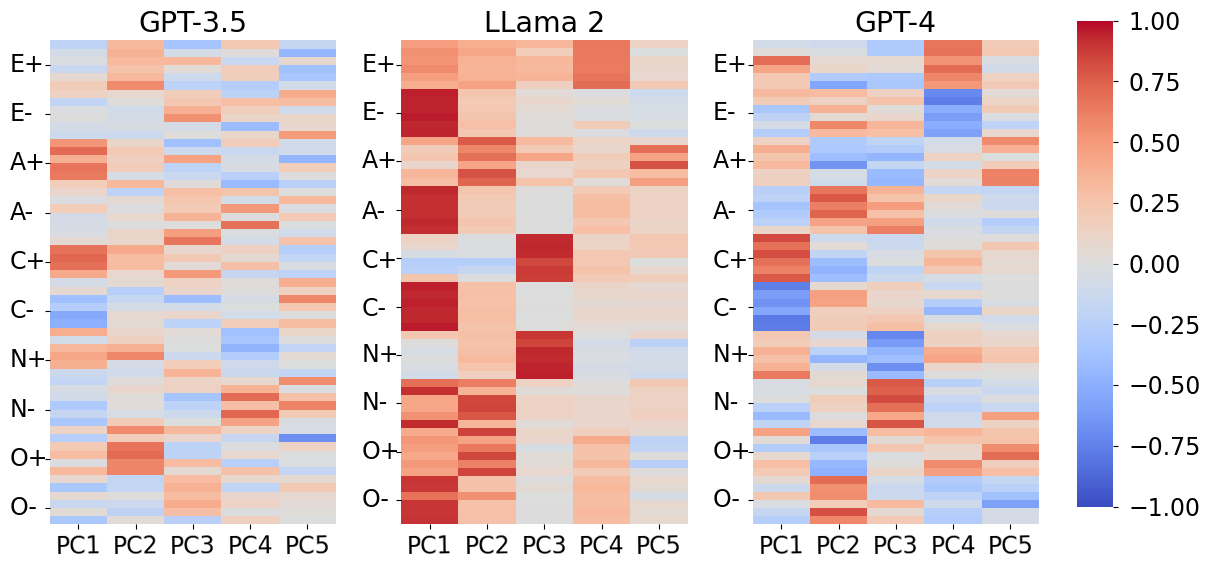

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 17})
plt.rcParams['ytick.major.pad']=8
data_files = [
    ('./preprocessed_final/incontext/pca_varimax_gpt35_incontext_personas_sorted_keysort.csv', 'GPT3.5 - incontext - personas'),
    ('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_personas_sorted_keysort.csv', 'LLama270bchat - incontext - personas'),
    ('./preprocessed_final/incontext/pca_varimax_gpt4_incontext_personas_sorted_keysort.csv', 'GPT4 - incontext - personas'),
#     # ('./preprocessed_final/nocontext/pca_varimax_gpt35_nocontext_personas_sorted_keysort.csv', 'GPT3.5 - nocontext - personas'),
#     # ('./preprocessed_final/nocontext/pca_varimax_llama2_70b_chat_nocontext_personas_sorted_keysort.csv', 'LLama270bchat - nocontext - personas'),
#     # ('./preprocessed_final/nocontext/pca_varimax_gpt4_nocontext_personas_sorted_keysort.csv', 'GPT4 - nocontext - personas'),
#     # ('./preprocessed_final/pca_varimax_bfi2_original_internetsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 internet sample'),
#     # ('./preprocessed_final/pca_varimax_bfi2_original_studentsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 student sample')
]

# data_files = [
#     ('./preprocessed_final/incontext/pca_varimax_gpt35_incontext_empty_personas_seeded_sorted_keysort.csv', 'GPT3.5 - in-context - seeded'),
#     ('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_empty_personas_seeded_sorted_keysort.csv', 'LLama270bchat - in-context - seeded'),
#     ('./preprocessed_final/incontext/pca_varimax_gpt4_incontext_empty_personas_seeded_sorted_keysort.csv', 'GPT4 - in-context - seeded')
# ]

titles = {
    "GPT3.5 - incontext - personas": "GPT-3.5",
    "GPT4 - incontext - personas": "GPT-4",
    "LLama270bchat - incontext - personas": "LLama 2",
    "PCA with varimax rotation loadings BFI2 internet sample": "Online Sample",
    "PCA with varimax rotation loadings BFI2 student sample": "Student Sample",
}
# Create subplots
# fig, axes = plt.subplots(1, 5, figsize=(18, 6), sharex=True)
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True)
cbar_ax = fig.add_axes([.91, 0.13, .03, 0.81])
i = 0
for ax, (file_name, plot_title) in zip(axes, data_files):
    i += 1 
    # Load the CSV data
    pca_loadings_df = pd.read_csv(file_name)
    pca_loadings_df.index = pca_loadings_df["Unnamed: 0"].values
    pca_loadings_df.drop(columns=["Unnamed: 0"], inplace=True)
    
    
    # Create heatmap plot
    sns.heatmap(pca_loadings_df,annot=False, cmap='coolwarm', center=0, ax=ax, cbar=True , vmin=-1, vmax=1, fmt=".2f",cbar_ax=cbar_ax,
                yticklabels=["E",None,"A"])
    plt.yticks(rotation=0)
    ax.set_yticks([3,9,15,21,27,33,39,45,51,57])
    ax.set_yticklabels(["E+","E-","A+","A-","C+","C-","N+","N-","O+","O-"], horizontalalignment='left')
    ax.set_xticklabels(["PC1", "PC2", "PC3", "PC4", "PC5"])
    ax.tick_params(axis='y',labelrotation=0)
    ax.tick_params(axis='x',labelrotation=1) 
    ax.set_title(titles[plot_title])
    for tick in ax.get_yaxis().get_major_ticks():
        tick.set_pad(25)

# Adjust layout
fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig("28022024_heatmaps_incontext_personas_wo_human.pdf")
# plt.subplots_adjust(left=-0.5)
plt.show()



C:\Users\tomsu\AppData\Local\Temp\ipykernel_17344\1024387561.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


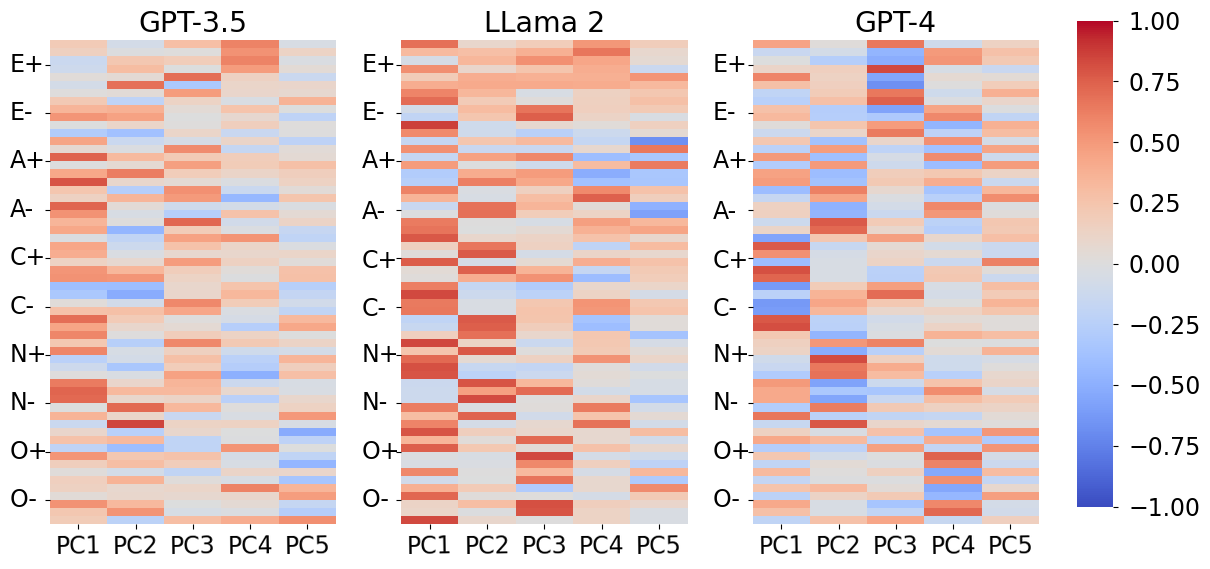

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 17})
plt.rcParams['ytick.major.pad']=8
data_files = [
    # ('./preprocessed_final/incontext/pca_varimax_gpt35_incontext_personas_sorted.csv', 'GPT3.5 - incontext - personas'),
    # ('./preprocessed_final/incontext/pca_varimax_gpt4_incontext_personas_sorted.csv', 'GPT4 - incontext - personas'),
    # ('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_personas_sorted.csv', 'LLama270bchat - incontext - personas'),
    ('./preprocessed_final/nocontext/pca_varimax_gpt35_nocontext_personas_sorted.csv', 'GPT3.5 - nocontext - personas'),
        ('./preprocessed_final/nocontext/pca_varimax_llama2_70b_chat_nocontext_personas_sorted.csv', 'LLama270bchat - nocontext - personas'),
    ('./preprocessed_final/nocontext/pca_varimax_gpt4_nocontext_personas_sorted.csv', 'GPT4 - nocontext - personas'),
    # ('./preprocessed_final/pca_varimax_bfi2_original_internetsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 internet sample'),
    # ('./preprocessed_final/pca_varimax_bfi2_original_studentsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 student sample')
]
titles = {
    "GPT3.5 - nocontext - personas": "GPT-3.5",
    "GPT4 - nocontext - personas": "GPT-4",
    "LLama270bchat - nocontext - personas": "LLama 2"
    # "PCA with varimax rotation loadings BFI2 internet sample": "Online Sample",
    # "PCA with varimax rotation loadings BFI2 student sample": "Student Sample",
}
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True)
cbar_ax = fig.add_axes([.91, 0.13, .03, 0.81])
i = 0
for ax, (file_name, plot_title) in zip(axes, data_files):
    i += 1 
    # Load the CSV data
    pca_loadings_df = pd.read_csv(file_name)
    pca_loadings_df.index = pca_loadings_df["Unnamed: 0"].values
    pca_loadings_df.drop(columns=["Unnamed: 0"], inplace=True)
    
    
    # Create heatmap plot
    sns.heatmap(pca_loadings_df,annot=False, cmap='coolwarm', center=0, ax=ax, cbar=True , vmin=-1, vmax=1, fmt=".2f",cbar_ax=cbar_ax,
                yticklabels=["E",None,"A"])
    plt.yticks(rotation=0)
    ax.set_yticks([3,9,15,21,27,33,39,45,51,57])
    ax.set_yticklabels(["E+","E-","A+","A-","C+","C-","N+","N-","O+","O-"], horizontalalignment='left')
    ax.set_xticklabels(["PC1", "PC2", "PC3", "PC4", "PC5"])
    ax.tick_params(axis='y',labelrotation=0)
    ax.tick_params(axis='x',labelrotation=1) 
    ax.set_title(titles[plot_title])
    for tick in ax.get_yaxis().get_major_ticks():
        tick.set_pad(25)

# Adjust layout
fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig("28022024_heatmaps_nocontext_personas_wo_human.pdf")
# plt.subplots_adjust(left=-0.5)
plt.show()



C:\Users\tomsu\AppData\Local\Temp\ipykernel_17344\1715224739.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


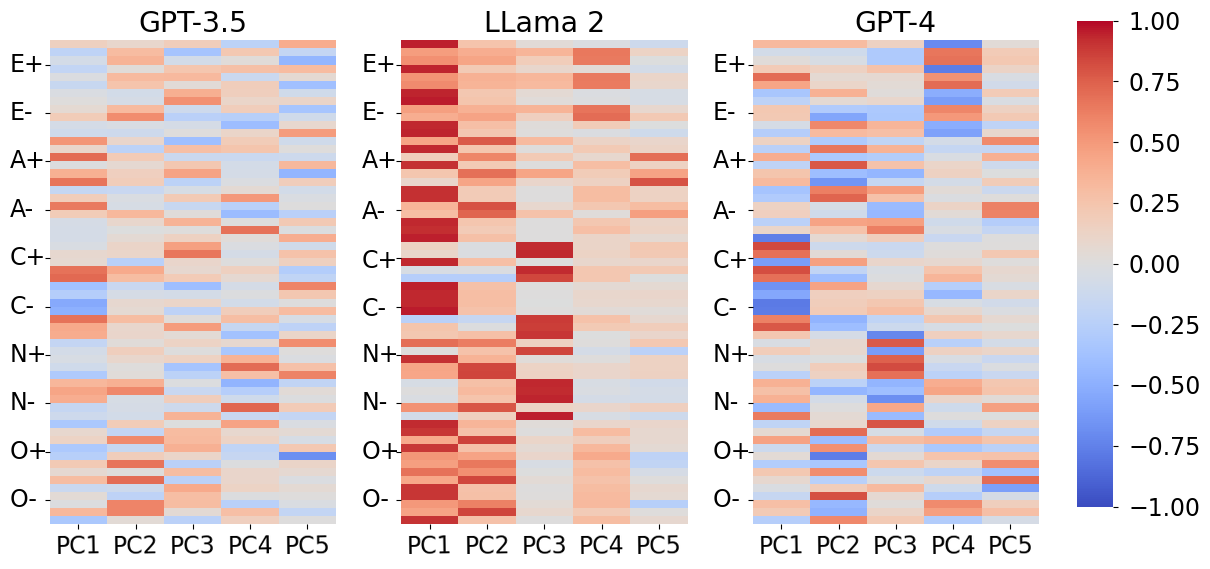

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 17})
plt.rcParams['ytick.major.pad']=8
data_files = [
    ('./preprocessed_final/incontext/pca_varimax_gpt35_incontext_personas_sorted.csv', 'GPT3.5 - incontext - personas'),
    ('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_personas_sorted.csv', 'LLama270bchat - incontext - personas'),
    ('./preprocessed_final/incontext/pca_varimax_gpt4_incontext_personas_sorted.csv', 'GPT4 - incontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_gpt35_nocontext_personas_sorted.csv', 'GPT3.5 - nocontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_gpt4_nocontext_personas_sorted.csv', 'GPT4 - nocontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_llama2_70b_chat_nocontext_personas_sorted.csv', 'LLama270bchat - nocontext - personas')
    # ('./preprocessed_final/pca_varimax_bfi2_original_internetsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 internet sample'),
    # ('./preprocessed_final/pca_varimax_bfi2_original_studentsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 student sample')
]
titles = {
    "GPT3.5 - incontext - personas": "GPT-3.5",
    "GPT4 - incontext - personas": "GPT-4",
    "LLama270bchat - incontext - personas": "LLama 2"
    # "PCA with varimax rotation loadings BFI2 internet sample": "Online Sample",
    # "PCA with varimax rotation loadings BFI2 student sample": "Student Sample",
}
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True)
cbar_ax = fig.add_axes([.91, 0.13, .03, 0.81])
i = 0
for ax, (file_name, plot_title) in zip(axes, data_files):
    i += 1 
    # Load the CSV data
    pca_loadings_df = pd.read_csv(file_name)
    pca_loadings_df.index = pca_loadings_df["Unnamed: 0"].values
    pca_loadings_df.drop(columns=["Unnamed: 0"], inplace=True)
    
    
    # Create heatmap plot
    sns.heatmap(pca_loadings_df,annot=False, cmap='coolwarm', center=0, ax=ax, cbar=True , vmin=-1, vmax=1, fmt=".2f",cbar_ax=cbar_ax,
                yticklabels=["E",None,"A"])
    plt.yticks(rotation=0)
    ax.set_yticks([3,9,15,21,27,33,39,45,51,57])
    ax.set_yticklabels(["E+","E-","A+","A-","C+","C-","N+","N-","O+","O-"], horizontalalignment='left')
    ax.set_xticklabels(["PC1", "PC2", "PC3", "PC4", "PC5"])
    ax.tick_params(axis='y',labelrotation=0)
    ax.tick_params(axis='x',labelrotation=1) 
    ax.set_title(titles[plot_title])
    for tick in ax.get_yaxis().get_major_ticks():
        tick.set_pad(25)

# Adjust layout
fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig("28022024_heatmaps_incontext_personas_wo_human.pdf")
# plt.subplots_adjust(left=-0.5)
plt.show()



C:\Users\tomsu\AppData\Local\Temp\ipykernel_17344\1779389047.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


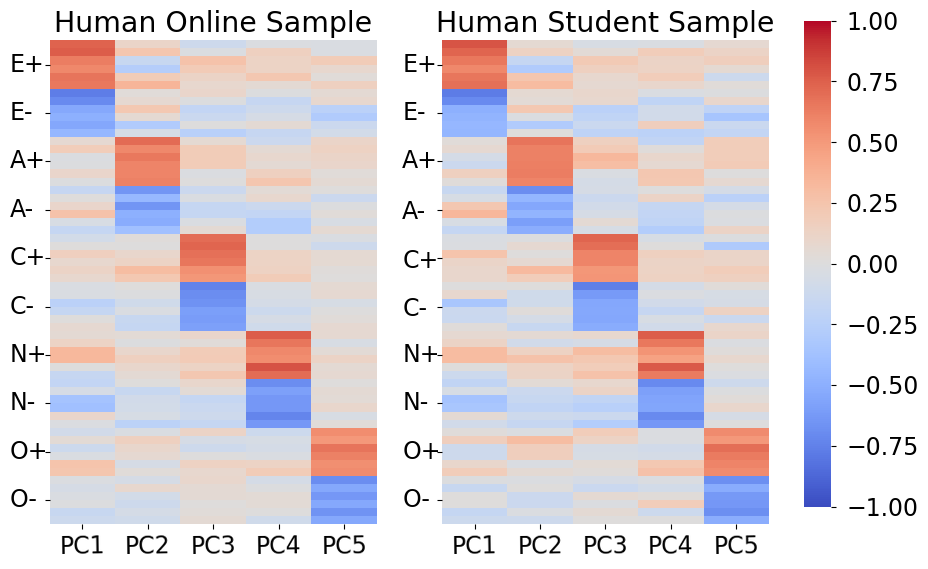

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 17})
plt.rcParams['ytick.major.pad']=8
data_files = [
    # ('./preprocessed_final/incontext/pca_varimax_gpt35_incontext_personas_sorted.csv', 'GPT3.5 - incontext - personas'),
    # ('./preprocessed_final/incontext/pca_varimax_gpt4_incontext_personas_sorted.csv', 'GPT4 - incontext - personas'),
    # ('./preprocessed_final/incontext/pca_varimax_llama2_70b_chat_incontext_personas_sorted.csv', 'LLama270bchat - incontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_gpt35_nocontext_personas_sorted.csv', 'GPT3.5 - nocontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_gpt4_nocontext_personas_sorted.csv', 'GPT4 - nocontext - personas'),
    # ('./preprocessed_final/nocontext/pca_varimax_llama2_70b_chat_nocontext_personas_sorted.csv', 'LLama270bchat - nocontext - personas')
    ('./preprocessed_final/pca_varimax_bfi2_original_internetsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 internet sample'),
    ('./preprocessed_final/pca_varimax_bfi2_original_studentsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 student sample')
]
titles = {
    # "GPT3.5 - nocontext - personas": "GPT-3.5",
    # "GPT4 - nocontext - personas": "GPT-4",
    # "LLama270bchat - nocontext - personas": "LLama 2"
    "PCA with varimax rotation loadings BFI2 internet sample": "Human Online Sample",
    "PCA with varimax rotation loadings BFI2 student sample": "Human Student Sample",
}
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 6), sharex=True)
cbar_ax = fig.add_axes([.91, 0.13, .03, 0.81])
i = 0
for ax, (file_name, plot_title) in zip(axes, data_files):
    i += 1 
    # Load the CSV data
    pca_loadings_df = pd.read_csv(file_name)
    pca_loadings_df.index = pca_loadings_df["Unnamed: 0"].values
    pca_loadings_df.drop(columns=["Unnamed: 0"], inplace=True)
    
    
    # Create heatmap plot
    sns.heatmap(pca_loadings_df,annot=False, cmap='coolwarm', center=0, ax=ax, cbar=True , vmin=-1, vmax=1, fmt=".2f",cbar_ax=cbar_ax,
                yticklabels=["E",None,"A"])
    plt.yticks(rotation=0)
    ax.set_yticks([3,9,15,21,27,33,39,45,51,57])
    ax.set_yticklabels(["E+","E-","A+","A-","C+","C-","N+","N-","O+","O-"], horizontalalignment='left')
    ax.set_xticklabels(["PC1", "PC2", "PC3", "PC4", "PC5"])
    ax.tick_params(axis='y',labelrotation=0)
    ax.tick_params(axis='x',labelrotation=1) 
    ax.set_title(titles[plot_title])
    for tick in ax.get_yaxis().get_major_ticks():
        tick.set_pad(25)

# Adjust layout
fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig("28022024_heatmaps_human.pdf")
# plt.subplots_adjust(left=-0.5)
plt.show()



C:\Users\tomsu\AppData\Local\Temp\ipykernel_3040\3273832915.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


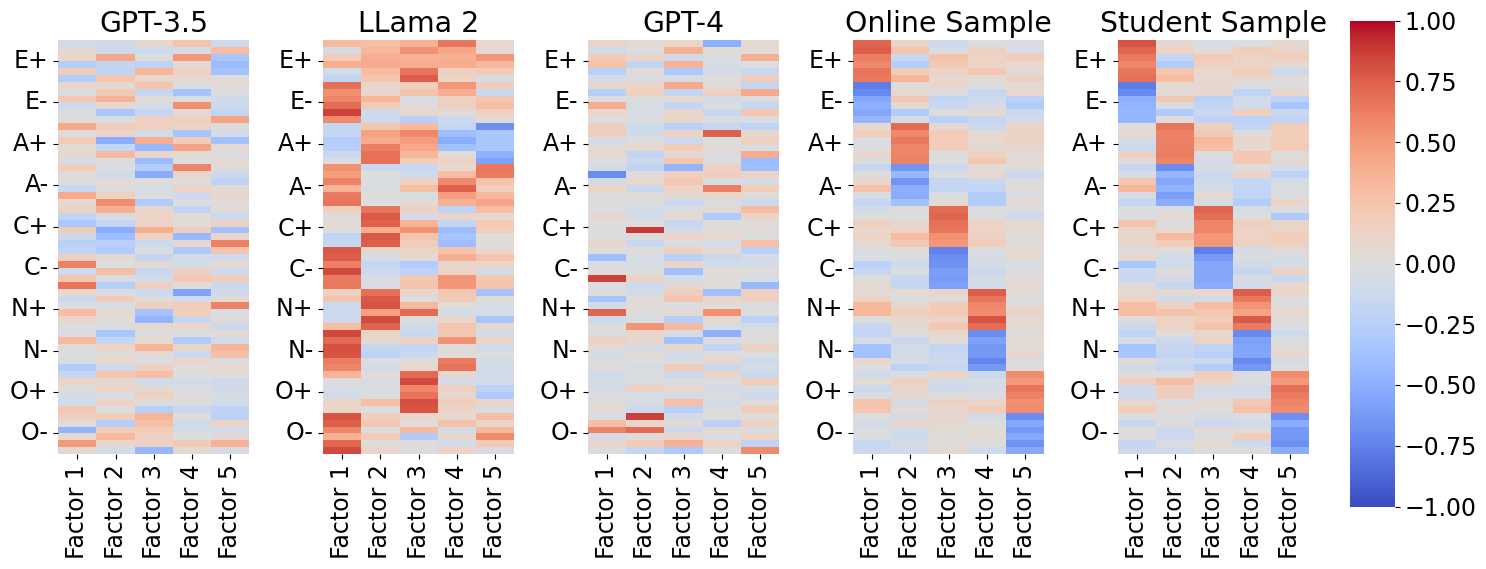

In [84]:
###Empty personas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 17})
data_files = [
    ('./preprocessed_final/19022024_pca_varimax_chatgpt_empty_personas_final_sorted_keysort.csv', 'PCA with varimax rotation loadings BFI2 for GPT3.5'),
    ('./preprocessed_final/26092023_pca_varimax_llama_2_personas_final_sorted_keysort.csv', 'PCA with varimax rotation loadings BFI2 for LLama2'),
    ('./preprocessed_final/19022024_pca_varimax_gpt4_empty_personas_final_sorted_keysort.csv', 'PCA with varimax rotation loadings BFI2 for GPT4'),
    ('./preprocessed_final/pca_varimax_bfi2_original_internetsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 internet sample'),
    ('./preprocessed_final/pca_varimax_bfi2_original_studentsample_keysort.csv', 'PCA with varimax rotation loadings BFI2 student sample')
]
titles = {
    "PCA with varimax rotation loadings BFI2 for GPT3.5": "GPT-3.5",
    "PCA with varimax rotation loadings BFI2 for GPT4": "GPT-4",
    "PCA with varimax rotation loadings BFI2 for LLama2": "LLama 2",
    "PCA with varimax rotation loadings BFI2 internet sample": "Online Sample",
    "PCA with varimax rotation loadings BFI2 student sample": "Student Sample",
}
# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 6), sharex=True)
cbar_ax = fig.add_axes([.91, 0.13, .03, 0.81])
i = 0
for ax, (file_name, plot_title) in zip(axes, data_files):
    i += 1 
    # Load the CSV data
    pca_loadings_df = pd.read_csv(file_name)
    pca_loadings_df.index = pca_loadings_df["Unnamed: 0"].values
    pca_loadings_df.drop(columns=["Unnamed: 0"], inplace=True)
    
    
    # Create heatmap plot
    sns.heatmap(pca_loadings_df,annot=False, cmap='coolwarm', center=0, ax=ax, cbar=True , vmin=-1, vmax=1, fmt=".2f",cbar_ax=cbar_ax,
                yticklabels=["E",None,"A"])
    plt.yticks(rotation=0)
    ax.set_yticks([3,9,15,21,27,33,39,45,51,57])
    ax.set_yticklabels(["E+","E-","A+","A-","C+","C-","N+","N-","O+","O-"])
    ax.tick_params(axis='y',labelrotation=0) 
    ax.set_title(titles[plot_title])

# Adjust layout
fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig("heatmaps_no_annotation_small.pdf")
plt.show()

